In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("F:\Diabetes_Project\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [7]:
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [8]:
#matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

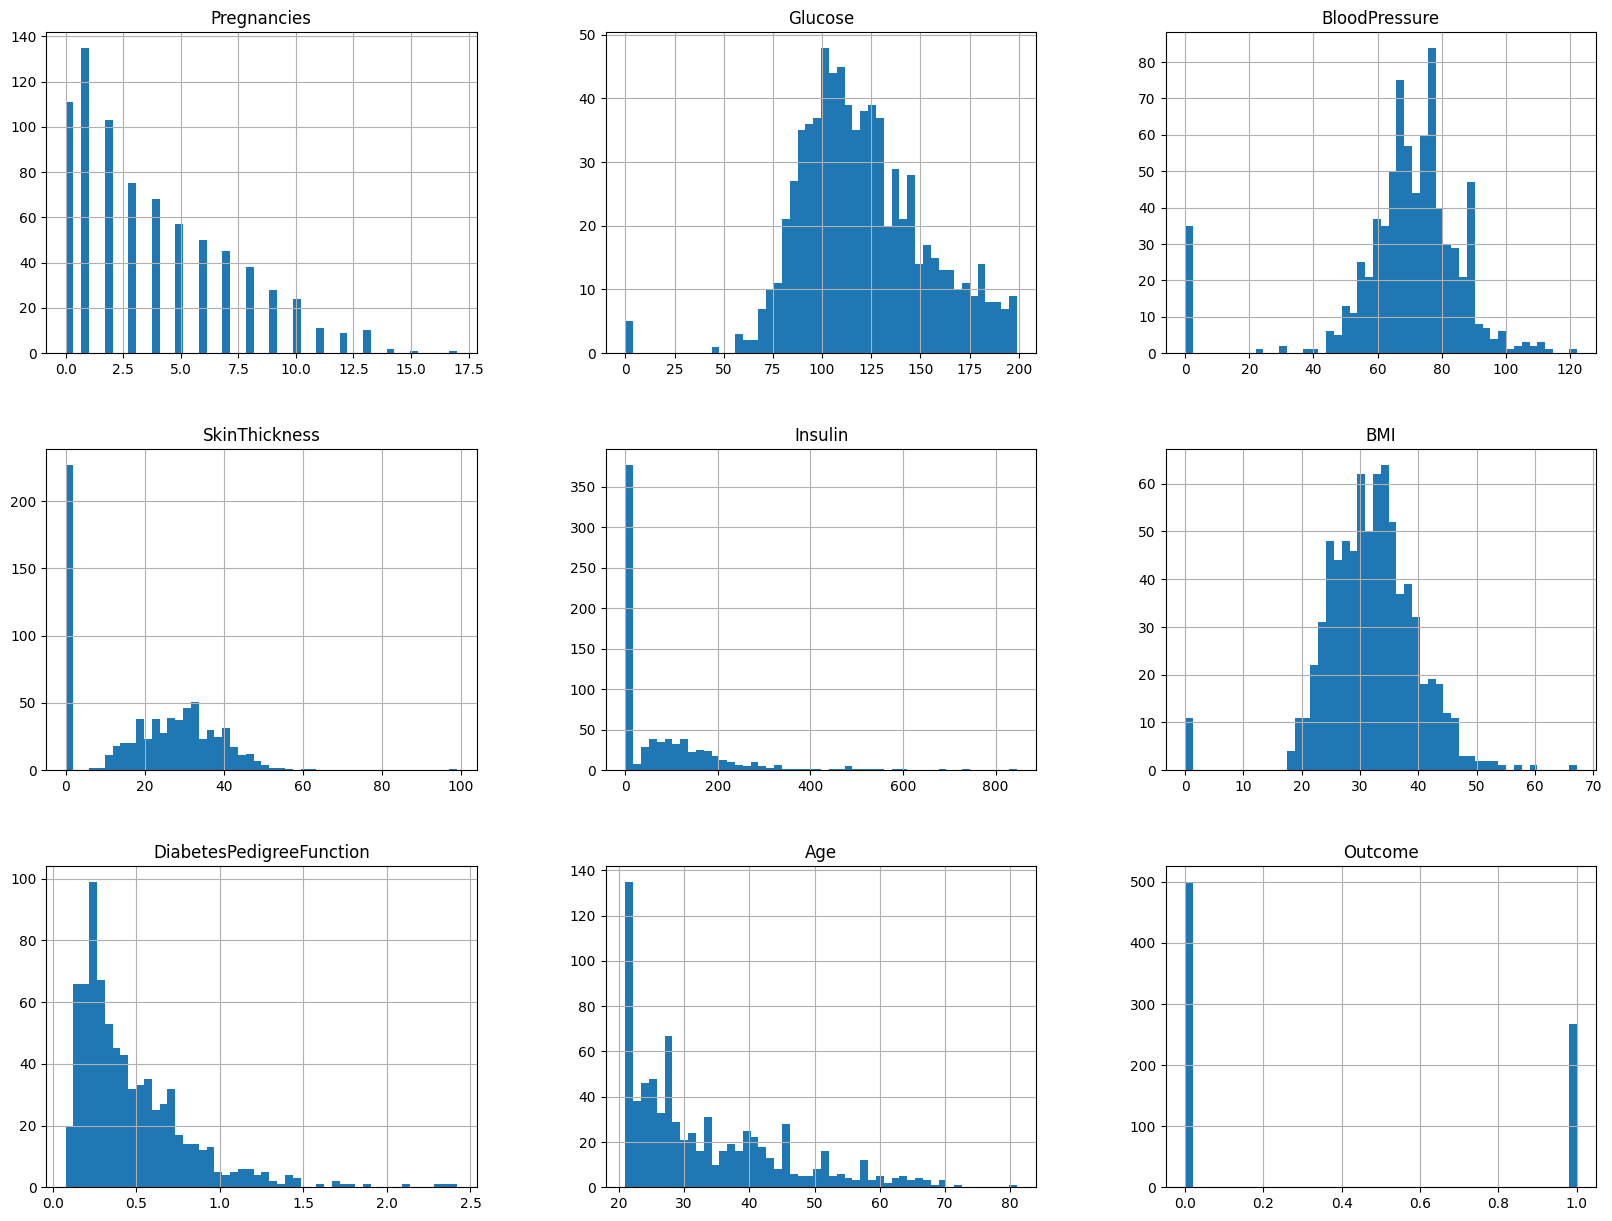

In [10]:
data.hist(bins=50, figsize=(20,15))


# Train - Test Splitting

In [11]:
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int (len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(data,0.2)

In [13]:
print(f"Rows in train set: {len (train_set)}\n Rows in test_set {len(test_set)}\n")

Rows in train set: 615
 Rows in test_set 153



In [14]:
dataset = train_set.copy()

# Looking for correlations

In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

array([[<Axes: xlabel='Outcome', ylabel='Outcome'>,
        <Axes: xlabel='Glucose', ylabel='Outcome'>,
        <Axes: xlabel='BMI', ylabel='Outcome'>,
        <Axes: xlabel='SkinThickness', ylabel='Outcome'>],
       [<Axes: xlabel='Outcome', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>],
       [<Axes: xlabel='Outcome', ylabel='BMI'>,
        <Axes: xlabel='Glucose', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='SkinThickness', ylabel='BMI'>],
       [<Axes: xlabel='Outcome', ylabel='SkinThickness'>,
        <Axes: xlabel='Glucose', ylabel='SkinThickness'>,
        <Axes: xlabel='BMI', ylabel='SkinThickness'>,
        <Axes: xlabel='SkinThickness', ylabel='SkinThickness'>]],
      dtype=object)

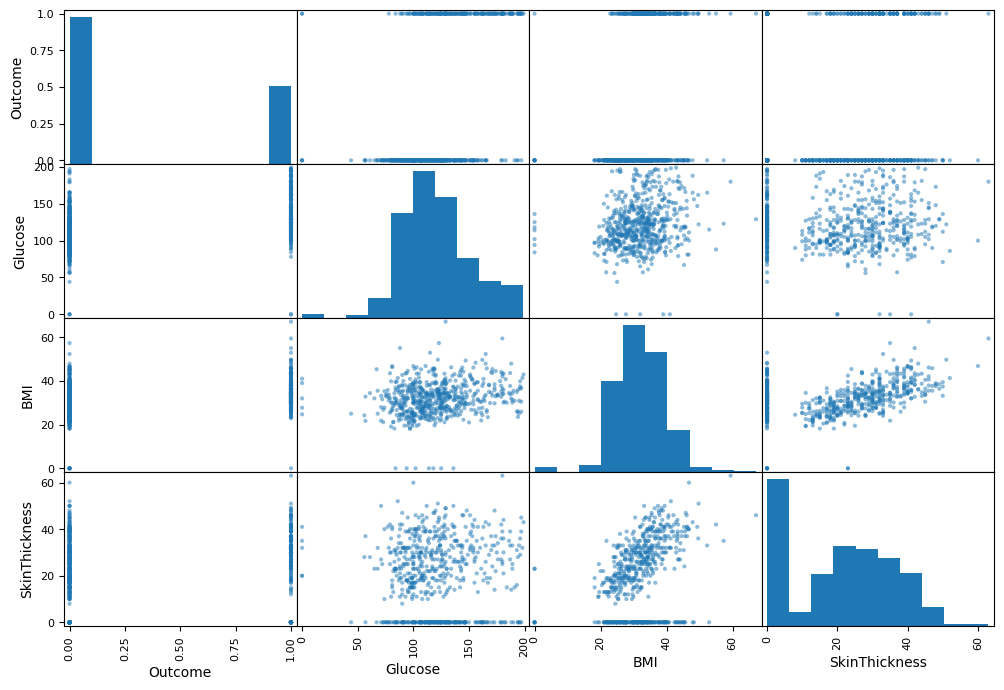

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['Outcome','Glucose','BMI','SkinThickness']
scatter_matrix(dataset[attributes],figsize = (12,8))

In [18]:
from pandas.plotting import scatter_matrix

<Axes: xlabel='Glucose', ylabel='Outcome'>

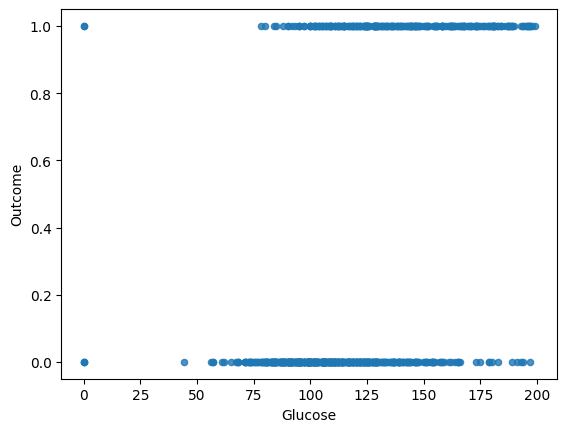

In [19]:
data.plot(kind="scatter", x="Glucose", y="Outcome",alpha =0.8)

In [20]:
dataset = train_set.drop("Outcome", axis =1)
dataset_labels = train_set["Outcome"].copy()

# Handling missing attributes

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([  3.   , 117.   ,  72.   ,  23.   ,  43.   ,  32.   ,   0.374,
        29.   ])

In [23]:
X = imputer.transform(dataset)

In [24]:
dataset_tr = pd.DataFrame(X, columns=dataset.columns)

In [25]:
dataset_tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,3.749593,120.778862,69.416260,20.430894,81.385366,31.988780,0.469551,32.917073
std,3.315013,32.064672,18.497532,15.441642,116.147509,7.735475,0.336707,11.496691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.100000,0.242000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,43.000000,32.000000,0.374000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.500000,36.350000,0.614500,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


# Creating pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [27]:
dataset_num_tr = my_pipeline.fit_transform(dataset)

In [28]:
dataset_num_tr.shape

(615, 8)

# Selecting model

In [29]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [30]:
model = LogisticRegression()
x_test = test_set.drop("Outcome", axis =1)
y_test = test_set["Outcome"].copy()
model.fit(dataset,dataset_labels)

C:\Users\Arif Uz Zaman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7712418300653595


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6851851851851852
Recall: 0.6727272727272727
F1 Score: 0.6788990825688074


In [36]:
import joblib

In [37]:
model.fit(dataset, dataset_labels)
joblib.dump(model, 'logistic_regression_model.joblib')

C:\Users\Arif Uz Zaman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.joblib']